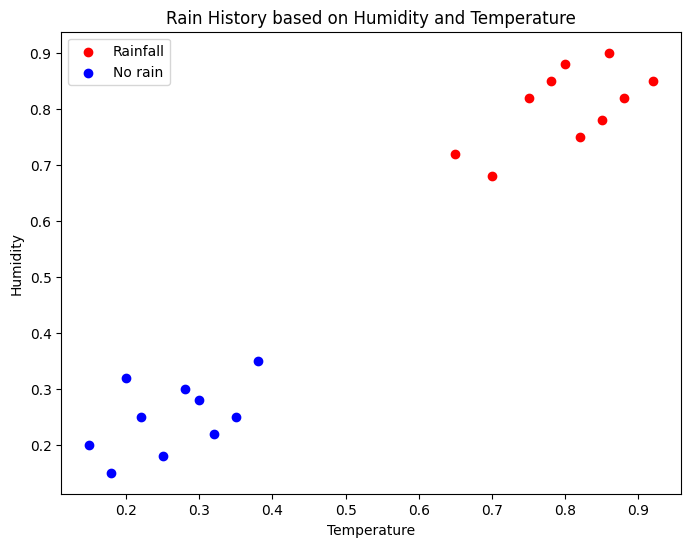

In [6]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import math



data = pandas.read_csv("Data/WeatherData_Q3.csv")

plt.figure(figsize=(8, 6))


frame = pandas.DataFrame(data)
rain = frame.loc[frame["rain"]==1]
nah = frame.loc[frame["rain"]==0]
plt.scatter(rain.temp, rain.humid,color='red',label='Rainfall')
plt.scatter(nah.temp, nah.humid,color='blue',label='No rain')
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.title('Rain History based on Humidity and Temperature')
plt.legend()
plt.show()

[-0.46683191  0.48663079]
Trial 1: Accuracy = 45.00%
Trial 2: Accuracy = 65.00%
Trial 3: Accuracy = 90.00%
Trial 4: Accuracy = 75.00%
Trial 5: Accuracy = 100.00%
Trial 6: Accuracy = 100.00%
Trial 7: Accuracy = 100.00%
Trial 8: Accuracy = 100.00%
Trial 9: Accuracy = 100.00%
Trial 10: Accuracy = 100.00%
The following conditions were not trained, rain was the expected output, predicted was the output, in my testing they almost always matched:
    temp  humid  rain  predicted
8   0.20   0.32     0          0
13  0.82   0.75     1          1
7   0.35   0.25     0          0
4   0.30   0.28     0          0
14  0.78   0.85     1          1


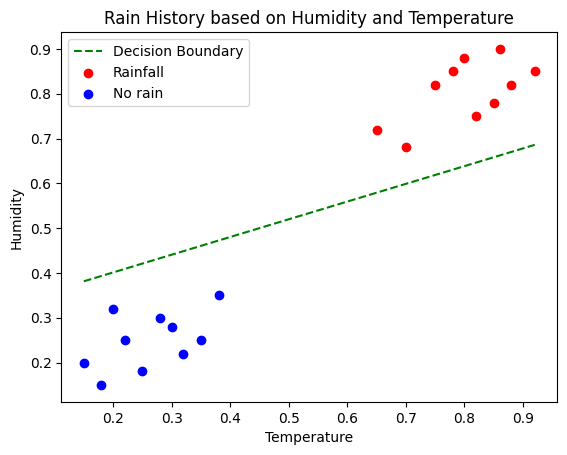

In [28]:

#random weights/bias to start
w = np.random.rand(2)# between 0 and 1
reset_kinda_ish = int(np.random.rand()*300)
np.random.seed(421)
w[0]-=.5
w[1]-=.5 # makes it between -.5 and .5
print(w)
b = np.random.rand(1)
frame = frame.sample(frac=1)#shuffle shuffle baby
np.random.seed(reset_kinda_ish)
train = frame.sample(frac=0.75)#for 20 data points this is 15 for one and 5 left behind
test = frame.drop(train.index)
x = frame[['temp',"humid"]].values # array of temp and humid values.
y = frame[['rain']].values # output or predictor



def perceive(meow):
    return 1 if meow >= 0 else 0
times = 10 # number of times to run through the data
# the data is so clearly distinct I set it to only run once so there may be an occasional error otherwise its beautiful. Set to ten for like perfection
rate = .1
accuracy =[]
for itr in range(times):
    correct= 0
    for i in range(len(x)):# uses every data set

        woof = np.dot(w, x[i])+b
        #print(woof, perceive(woof))
        y_pred = perceive(woof)
        error = y[i] - y_pred

        w += rate*error*x[i]
        b+= rate*error

        if y_pred == y[i]:
            correct += 1
    accu = correct / len(x)
    accuracy.append(accu)
    print(f"Trial {itr+1}: Accuracy = {accu:.2%}")

x_min, x_max = frame.temp.min(), frame.temp.max()
x_vals = np.linspace(x_min, x_max, 100)
y_vals = - (w[0] / w[1]) * x_vals - (b / w[1])

valid = (y_vals >= 0) & (y_vals <= 1)

x_vals = x_vals[valid] # otherwise the graph would sometimes go from -14 to 1 or something we only want to add to our original plot
y_vals = y_vals[valid]

plt.plot(x_vals, y_vals, color='green', linestyle='dashed', label='Decision Boundary')


test['predicted'] = test.apply(lambda dota: perceive(np.dot(w, [dota['temp'], dota['humid']]) + b), axis=1)# create a new column for the dataset that was not trained to see output
print("The following conditions were not trained, rain was the expected output, predicted was the output, in my testing they almost always matched:")
print(test)
plt.scatter(rain.temp, rain.humid,color='red',label='Rainfall')
plt.scatter(nah.temp, nah.humid,color='blue',label='No rain')
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.title('Rain History based on Humidity and Temperature')
plt.legend()
plt.show()



In [16]:
print('answer for C frfr')

answer for C frfr
